In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)

## Data Cleaning - Original Data File

In [2]:
raw = pd.read_excel("data_project2.xlsx")
raw

,Gene Name,Annotation,Accession #,Probe Name,Class Name,Species Name,20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,...,20151118_CAN IMMUN PROF PREOP2_NYU 789GR_06.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 957GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1005GR_08.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1270GR_07.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC
0,NaN,NaN,NaN,NaN,NaN,NaN,ADS1,ADS1,ADS1,ADS1,...,GR,GR,GR,GR,GR,GR,GR,GR,GR,GR
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2M,NaN,NM_000014.4,NM_000014.4:1685,Endogenous,Hs,14,41,29,12,...,26,15,10,6,18,67,20,13,23,7
3,ABCB1,NaN,NM_000927.3,NM_000927.3:3910,Endogenous,Hs,60,105,67,58,...,54,47,47,9,80,164,34,53,52,11
4,ABL1,NaN,NM_005157.3,NM_005157.3:3200,Endogenous,Hs,59,59,43,47,...,30,42,60,17,72,51,41,27,28,7
5,ADA,NaN,NM_000022.2,NM_000022.2:1300,Endogenous,Hs,116,128,58,68,...,47,82,83,18,95,127,86,51,53,13
6,ADORA2A,NaN,NM_000675.3,NM_000675.3:1095,Endogenous,Hs,93,92,97,39,...,38,49,42,8,63,101,54,32,24,20
7,AICDA,NaN,NM_020661.1,NM_020661.1:567,Endogenous,Hs,18,24,18,30,...,24,15,14,14,22,17,18,6,10,7
8,AIRE,NaN,NM_000383.2,NM_000383.2:1864,Endogenous,Hs,29,41,37,34,...,20,20,16,15,13,31,13,5,21,13
9,AKT3,NaN,NM_181690.1,NM_181690.1:755,Endogenous,Hs,260,291,171,185,...,270,221,276,34,434,580,297,191,177,18


In [3]:
df = raw.drop(1)  # remove blank row
df

,Gene Name,Annotation,Accession #,Probe Name,Class Name,Species Name,20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,...,20151118_CAN IMMUN PROF PREOP2_NYU 789GR_06.RCC,20151118_CAN IMMUN PROF PREOP2_NYU 957GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1005GR_08.RCC,20151119_CAN IMM PROF PREOP 3_NYU 1270GR_07.RCC,20151119_CAN IMM PROF PREOP 3_NYU 700GR_06.RCC,20151119_CAN IMM PROF PREOP 3_NYU 744GR_09.RCC,20151119_CAN IMM PROF PREOP 3_NYU 974GR_10.RCC,20151120_CAN IMM PROF 4_NYU 824GR_05.RCC,20151120_CAN IMM PROF 4_NYU 862GR_04.RCC,20151120_CAN IMM PROF 4_NYU 922GR_06.RCC
0,NaN,NaN,NaN,NaN,NaN,NaN,ADS1,ADS1,ADS1,ADS1,...,GR,GR,GR,GR,GR,GR,GR,GR,GR,GR
2,A2M,NaN,NM_000014.4,NM_000014.4:1685,Endogenous,Hs,14,41,29,12,...,26,15,10,6,18,67,20,13,23,7
3,ABCB1,NaN,NM_000927.3,NM_000927.3:3910,Endogenous,Hs,60,105,67,58,...,54,47,47,9,80,164,34,53,52,11
4,ABL1,NaN,NM_005157.3,NM_005157.3:3200,Endogenous,Hs,59,59,43,47,...,30,42,60,17,72,51,41,27,28,7
5,ADA,NaN,NM_000022.2,NM_000022.2:1300,Endogenous,Hs,116,128,58,68,...,47,82,83,18,95,127,86,51,53,13
6,ADORA2A,NaN,NM_000675.3,NM_000675.3:1095,Endogenous,Hs,93,92,97,39,...,38,49,42,8,63,101,54,32,24,20
7,AICDA,NaN,NM_020661.1,NM_020661.1:567,Endogenous,Hs,18,24,18,30,...,24,15,14,14,22,17,18,6,10,7
8,AIRE,NaN,NM_000383.2,NM_000383.2:1864,Endogenous,Hs,29,41,37,34,...,20,20,16,15,13,31,13,5,21,13
9,AKT3,NaN,NM_181690.1,NM_181690.1:755,Endogenous,Hs,260,291,171,185,...,270,221,276,34,434,580,297,191,177,18
10,ALCAM,NaN,NM_001627.3,NM_001627.3:789,Endogenous,Hs,52,70,17,28,...,31,30,34,10,50,124,27,12,38,5


In [4]:
# rearrange df to make each row a patient and each column a gene
df = df.set_index("Gene Name")
df = df.T
df = df.rename(columns={np.nan: "disease"})
df.index.name = "Patient"
df.columns.name = ""
df

,disease,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,...,NEG_E,NEG_F,NEG_G,NEG_H,POS_A,POS_B,POS_C,POS_D,POS_E,POS_F
Patient,,,,,,,,,,,,,,,,,,,,,
Annotation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accession #,NaN,NM_000014.4,NM_000927.3,NM_005157.3,NM_000022.2,NM_000675.3,NM_020661.1,NM_000383.2,NM_181690.1,NM_001627.3,...,ERCC_00098.1,ERCC_00126.1,ERCC_00144.1,ERCC_00154.1,ERCC_00117.1,ERCC_00112.1,ERCC_00002.1,ERCC_00092.1,ERCC_00035.1,ERCC_00034.1
Probe Name,NaN,NM_000014.4:1685,NM_000927.3:3910,NM_005157.3:3200,NM_000022.2:1300,NM_000675.3:1095,NM_020661.1:567,NM_000383.2:1864,NM_181690.1:755,NM_001627.3:789,...,ERCC_00098.1:785,ERCC_00126.1:220,ERCC_00144.1:15,ERCC_00154.1:115,ERCC_00117.1:385,ERCC_00112.1:695,ERCC_00002.1:850,ERCC_00092.1:540,ERCC_00035.1:485,ERCC_00034.1:195
Class Name,NaN,Endogenous,Endogenous,Endogenous,Endogenous,Endogenous,Endogenous,Endogenous,Endogenous,Endogenous,...,Negative,Negative,Negative,Negative,Positive,Positive,Positive,Positive,Positive,Positive
Species Name,NaN,Hs,Hs,Hs,Hs,Hs,Hs,Hs,Hs,Hs,...,CUS,CUS,CUS,CUS,CUS,CUS,CUS,CUS,CUS,CUS
20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,ADS1,14,60,59,116,93,18,29,260,52,...,19,26,36,38,59943,18199,5266,1391,225,100
20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,ADS1,41,105,59,128,92,24,41,291,70,...,28,27,35,49,62055,18815,5336,1278,256,96
20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,ADS1,29,67,43,58,97,18,37,171,17,...,25,21,44,52,72518,22041,6273,1611,291,112
20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,ADS1,12,58,47,68,39,30,34,185,28,...,35,36,35,61,72194,22288,6345,1536,292,124


In [5]:
# remove irrelevant rows
df = df.iloc[5:]
df

,disease,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,...,NEG_E,NEG_F,NEG_G,NEG_H,POS_A,POS_B,POS_C,POS_D,POS_E,POS_F
Patient,,,,,,,,,,,,,,,,,,,,,
20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,ADS1,14,60,59,116,93,18,29,260,52,...,19,26,36,38,59943,18199,5266,1391,225,100
20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,ADS1,41,105,59,128,92,24,41,291,70,...,28,27,35,49,62055,18815,5336,1278,256,96
20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,ADS1,29,67,43,58,97,18,37,171,17,...,25,21,44,52,72518,22041,6273,1611,291,112
20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,ADS1,12,58,47,68,39,30,34,185,28,...,35,36,35,61,72194,22288,6345,1536,292,124
20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,ADS1,36,85,33,64,61,32,43,86,20,...,34,23,12,26,66384,19967,5674,1317,237,104
20150610_CAN IMM PAN ST1 PAN2_NYU125 S1_04.RCC,ADS1,26,49,27,41,26,23,39,69,34,...,21,20,26,26,67501,19919,5715,1307,274,94
20150610_CAN IMM PAN ST1 PAN2_NYU175 S1_06.RCC,ADS1,26,31,27,41,116,25,29,72,13,...,30,22,22,32,64227,19433,5586,1385,251,86
20150610_CAN IMM PAN ST1 PAN2_NYU201 S1_05.RCC,ADS1,14,28,27,37,27,34,24,54,16,...,36,20,27,35,75800,22695,6514,1590,281,113
20150610_CAN IMM PAN ST1 PAN2_NYU50 S1_01.RCC,ADS1,36,53,39,49,25,22,39,70,20,...,21,18,35,22,66611,19901,5689,1386,253,112


In [6]:
# replace the disease string with a binary value for cancerous vs benign
# Ignore the warning here. I know what I'm doing; I'm right and it's wrong.
df["disease"] = df["disease"].map(lambda x: 1 if x == "ADS1" else 0)
df

/home/zaned/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,disease,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,...,NEG_E,NEG_F,NEG_G,NEG_H,POS_A,POS_B,POS_C,POS_D,POS_E,POS_F
Patient,,,,,,,,,,,,,,,,,,,,,
20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,1,14,60,59,116,93,18,29,260,52,...,19,26,36,38,59943,18199,5266,1391,225,100
20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,1,41,105,59,128,92,24,41,291,70,...,28,27,35,49,62055,18815,5336,1278,256,96
20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,1,29,67,43,58,97,18,37,171,17,...,25,21,44,52,72518,22041,6273,1611,291,112
20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,1,12,58,47,68,39,30,34,185,28,...,35,36,35,61,72194,22288,6345,1536,292,124
20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,1,36,85,33,64,61,32,43,86,20,...,34,23,12,26,66384,19967,5674,1317,237,104
20150610_CAN IMM PAN ST1 PAN2_NYU125 S1_04.RCC,1,26,49,27,41,26,23,39,69,34,...,21,20,26,26,67501,19919,5715,1307,274,94
20150610_CAN IMM PAN ST1 PAN2_NYU175 S1_06.RCC,1,26,31,27,41,116,25,29,72,13,...,30,22,22,32,64227,19433,5586,1385,251,86
20150610_CAN IMM PAN ST1 PAN2_NYU201 S1_05.RCC,1,14,28,27,37,27,34,24,54,16,...,36,20,27,35,75800,22695,6514,1590,281,113
20150610_CAN IMM PAN ST1 PAN2_NYU50 S1_01.RCC,1,36,53,39,49,25,22,39,70,20,...,21,18,35,22,66611,19901,5689,1386,253,112


In [7]:
# move "disease" target variable column to the back; purely cosmetic change
df = df[df.columns[1:].append(df.columns[:1])]
df

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,NEG_F,NEG_G,NEG_H,POS_A,POS_B,POS_C,POS_D,POS_E,POS_F,disease
Patient,,,,,,,,,,,,,,,,,,,,,
20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC,14,60,59,116,93,18,29,260,52,19,...,26,36,38,59943,18199,5266,1391,225,100,1
20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC,41,105,59,128,92,24,41,291,70,42,...,27,35,49,62055,18815,5336,1278,256,96,1
20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC,29,67,43,58,97,18,37,171,17,33,...,21,44,52,72518,22041,6273,1611,291,112,1
20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC,12,58,47,68,39,30,34,185,28,30,...,36,35,61,72194,22288,6345,1536,292,124,1
20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC,36,85,33,64,61,32,43,86,20,39,...,23,12,26,66384,19967,5674,1317,237,104,1
20150610_CAN IMM PAN ST1 PAN2_NYU125 S1_04.RCC,26,49,27,41,26,23,39,69,34,34,...,20,26,26,67501,19919,5715,1307,274,94,1
20150610_CAN IMM PAN ST1 PAN2_NYU175 S1_06.RCC,26,31,27,41,116,25,29,72,13,27,...,22,22,32,64227,19433,5586,1385,251,86,1
20150610_CAN IMM PAN ST1 PAN2_NYU201 S1_05.RCC,14,28,27,37,27,34,24,54,16,24,...,20,27,35,75800,22695,6514,1590,281,113,1
20150610_CAN IMM PAN ST1 PAN2_NYU50 S1_01.RCC,36,53,39,49,25,22,39,70,20,41,...,18,35,22,66611,19901,5689,1386,253,112,1


In [8]:
# convert Patient column to ID number
# TODO: make sure this is actually how to translate to ID numbers

def ConvertPatientId(full):
    print(full)
    s = full[full.find("NYU")+3:].strip()
    s = s[:re.search("\d*", s).span()[1]]

    print(s)
    print()
    return int(s)

df.index = df.index.map(ConvertPatientId)
df = df.sort_index()
df

20150610_CAN IMM PAN ST1 PAN2_NYU1072 S1_09.RCC
1072

20150610_CAN IMM PAN ST1 PAN2_NYU1074 S1_10.RCC
1074

20150610_CAN IMM PAN ST1 PAN2_NYU1079 S1_11.RCC
1079

20150610_CAN IMM PAN ST1 PAN2_NYU1084 S1_12.RCC
1084

20150609_can imm stage 1 lu ca_NYU46 S1_12.RCC
46

20150610_CAN IMM PAN ST1 PAN2_NYU125 S1_04.RCC
125

20150610_CAN IMM PAN ST1 PAN2_NYU175 S1_06.RCC
175

20150610_CAN IMM PAN ST1 PAN2_NYU201 S1_05.RCC
201

20150610_CAN IMM PAN ST1 PAN2_NYU50 S1_01.RCC
50

20150610_CAN IMM PAN ST1 PAN2_NYU62 S1_02.RCC
62

20150610_CAN IMM PAN ST1 PAN2_NYU68 S1_03.RCC
68

20150915_CAN IMMUNE PANEL_NYU113_05.RCC
113

20150915_CAN IMMUNE PANEL_NYU116_06.RCC
116

20150915_CAN IMMUNE PANEL_NYU117_07.RCC
117

20150915_CAN IMMUNE PANEL_NYU32_01.RCC
32

20150915_CAN IMMUNE PANEL_NYU89_03.RCC
89

20150915_CAN IMMUNE PANEL_NYU98_04.RCC
98

20150916_CANCER IMM PANEL _ NYU134_01.RCC
134

20150916_CANCER IMM PANEL _NYU154_02.RCC
154

20150916_CANCER IMM PANEL _NYU163_03.RCC
163

20150916_CANCER IMM PANE

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,NEG_F,NEG_G,NEG_H,POS_A,POS_B,POS_C,POS_D,POS_E,POS_F,disease
Patient,,,,,,,,,,,,,,,,,,,,,
20,15,34,27,35,27,28,24,77,14,22,...,31,24,27,73575,23352,6761,1565,268,115,1
32,8,17,17,15,9,15,11,24,13,25,...,13,14,11,44265,12093,4185,905,136,86,1
35,29,38,23,42,25,47,32,51,22,25,...,31,22,32,63953,19530,5532,1362,228,104,1
43,11,17,24,21,9,10,6,26,10,21,...,13,20,10,48131,13488,4605,972,152,100,1
46,36,85,33,64,61,32,43,86,20,39,...,23,12,26,66384,19967,5674,1317,237,104,1
49,13,56,26,38,55,39,20,161,20,18,...,28,21,30,66920,20779,6027,1441,255,134,1
50,36,53,39,49,25,22,39,70,20,41,...,18,35,22,66611,19901,5689,1386,253,112,1
62,30,34,34,48,35,19,34,46,13,44,...,23,26,31,73616,21481,6223,1531,271,118,1
68,20,17,24,32,33,34,29,48,20,30,...,21,32,27,68190,20208,5784,1443,267,111,1


## Data Cleaning - Demographic Data Files

In [9]:
# select common columns temporarily for testing out merging stuff
df_dem_gran = pd.read_excel("data_project2_demographics.xlsx", index_col=0, sheet_name=0)[["Gender", "Race", "Age", "size_cm"]]

# bad data
df_dem_gran.at[1641, "Race"] = ""

df_dem_gran

,Gender,Race,Age,size_cm
ID,,,,
209,female,White,58,1.5
249,Female,White,74,1.1
332,Female,White,80,NaN
685,female,White,69,0.7
696,Female,White,61,NaN
700,female,White,63,1
744,male,White,78,2.7
775,Female,White,44,1.6
789,Female,White,55,na


In [10]:
df_dem_ad = pd.read_excel("data_project2_demographics.xlsx", index_col=1, sheet_name=1)[["Duplicate?", "Gender", "Race", "Age", "size_cm"]]
df_dem_ad = df_dem_ad.loc[df_dem_ad["Duplicate?"]=="no"].drop(columns="Duplicate?")

df_dem_ad

,Gender,Race,Age,size_cm
ID,,,,
20,male,White,75,1.3
35,female,White,64,1.9
49,male,White,71,3.2
50,male,White,77,1.0
62,male,White,64,1.4
68,female,White,71,1.7
113,female,White,74,1.3
116,female,White,65,1.7
125,male,White,60,1.4


## Merging into Single Data Set

In [11]:
df_dem = pd.concat([df_dem_gran, df_dem_ad])
df_dem = df_dem.sort_index()
print(df_dem.shape)
df_dem

(293, 4)


,Gender,Race,Age,size_cm
ID,,,,
20,male,White,75,1.3
35,female,White,64,1.9
49,male,White,71,3.2
50,male,White,77,1
62,male,White,64,1.4
68,female,White,71,1.7
113,female,White,74,1.3
116,female,White,65,1.7
125,male,White,60,1.4


In [12]:
print(df.shape)
df

(117, 785)


,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,NEG_F,NEG_G,NEG_H,POS_A,POS_B,POS_C,POS_D,POS_E,POS_F,disease
Patient,,,,,,,,,,,,,,,,,,,,,
20,15,34,27,35,27,28,24,77,14,22,...,31,24,27,73575,23352,6761,1565,268,115,1
32,8,17,17,15,9,15,11,24,13,25,...,13,14,11,44265,12093,4185,905,136,86,1
35,29,38,23,42,25,47,32,51,22,25,...,31,22,32,63953,19530,5532,1362,228,104,1
43,11,17,24,21,9,10,6,26,10,21,...,13,20,10,48131,13488,4605,972,152,100,1
46,36,85,33,64,61,32,43,86,20,39,...,23,12,26,66384,19967,5674,1317,237,104,1
49,13,56,26,38,55,39,20,161,20,18,...,28,21,30,66920,20779,6027,1441,255,134,1
50,36,53,39,49,25,22,39,70,20,41,...,18,35,22,66611,19901,5689,1386,253,112,1
62,30,34,34,48,35,19,34,46,13,44,...,23,26,31,73616,21481,6223,1531,271,118,1
68,20,17,24,32,33,34,29,48,20,30,...,21,32,27,68190,20208,5784,1443,267,111,1


In [13]:
df = pd.merge(df, df_dem, left_index=True, right_index=True, how="left")
df

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,POS_B,POS_C,POS_D,POS_E,POS_F,disease,Gender,Race,Age,size_cm
Patient,,,,,,,,,,,,,,,,,,,,,
20,15,34,27,35,27,28,24,77,14,22,...,23352,6761,1565,268,115,1,male,White,75.0,1.3
32,8,17,17,15,9,15,11,24,13,25,...,12093,4185,905,136,86,1,NaN,NaN,NaN,NaN
35,29,38,23,42,25,47,32,51,22,25,...,19530,5532,1362,228,104,1,female,White,64.0,1.9
43,11,17,24,21,9,10,6,26,10,21,...,13488,4605,972,152,100,1,NaN,NaN,NaN,NaN
46,36,85,33,64,61,32,43,86,20,39,...,19967,5674,1317,237,104,1,NaN,NaN,NaN,NaN
49,13,56,26,38,55,39,20,161,20,18,...,20779,6027,1441,255,134,1,male,White,71.0,3.2
50,36,53,39,49,25,22,39,70,20,41,...,19901,5689,1386,253,112,1,male,White,77.0,1
62,30,34,34,48,35,19,34,46,13,44,...,21481,6223,1531,271,118,1,male,White,64.0,1.4
68,20,17,24,32,33,34,29,48,20,30,...,20208,5784,1443,267,111,1,female,White,71.0,1.7


## Data Cleaning - Final Dataset

In [14]:
df = df.rename(columns={"size_cm": "Size_cm", "disease": "Disease"})

df.loc[:,["Gender", "Race"]] = df.loc[:,["Gender", "Race"]].fillna("unknown/refused")

def collapseRace(s):
    translations = {
        "black or african america": "black/african american",
        "hispanic or latino": "hispanic/latino",
        "hispanic": "hispanic/latino",
        "african america": "black/african american"
    }
    
    if s in translations:
        return translations[s]
    else:
        return s

for c in ["Gender", "Race"]:
    df[c] = df[c].map(lambda s: s.lower())
df["Race"] = df["Race"].map(lambda s: collapseRace(s))

df

white                       65
unknown/refused             42
asian                        3
black or african america     2
hispanic or latino           2
hispanic                     1
african america              1
                             1
Name: Race, dtype: int64


,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,POS_B,POS_C,POS_D,POS_E,POS_F,Disease,Gender,Race,Age,Size_cm
Patient,,,,,,,,,,,,,,,,,,,,,
20,15,34,27,35,27,28,24,77,14,22,...,23352,6761,1565,268,115,1,male,white,75.0,1.3
32,8,17,17,15,9,15,11,24,13,25,...,12093,4185,905,136,86,1,unknown/refused,unknown/refused,NaN,NaN
35,29,38,23,42,25,47,32,51,22,25,...,19530,5532,1362,228,104,1,female,white,64.0,1.9
43,11,17,24,21,9,10,6,26,10,21,...,13488,4605,972,152,100,1,unknown/refused,unknown/refused,NaN,NaN
46,36,85,33,64,61,32,43,86,20,39,...,19967,5674,1317,237,104,1,unknown/refused,unknown/refused,NaN,NaN
49,13,56,26,38,55,39,20,161,20,18,...,20779,6027,1441,255,134,1,male,white,71.0,3.2
50,36,53,39,49,25,22,39,70,20,41,...,19901,5689,1386,253,112,1,male,white,77.0,1
62,30,34,34,48,35,19,34,46,13,44,...,21481,6223,1531,271,118,1,male,white,64.0,1.4
68,20,17,24,32,33,34,29,48,20,30,...,20208,5784,1443,267,111,1,female,white,71.0,1.7


## Final Output

In [15]:
df.to_csv("data_cleaned.csv")

In [16]:
# test
df = pd.read_csv("data_cleaned.csv", index_col=0)
df

,A2M,ABCB1,ABL1,ADA,ADORA2A,AICDA,AIRE,AKT3,ALCAM,AMBP,...,POS_B,POS_C,POS_D,POS_E,POS_F,Disease,Gender,Race,Age,Size_cm
Patient,,,,,,,,,,,,,,,,,,,,,
20,15,34,27,35,27,28,24,77,14,22,...,23352,6761,1565,268,115,1,male,white,75.0,1.3
32,8,17,17,15,9,15,11,24,13,25,...,12093,4185,905,136,86,1,unknown/refused,unknown/refused,NaN,NaN
35,29,38,23,42,25,47,32,51,22,25,...,19530,5532,1362,228,104,1,female,white,64.0,1.9
43,11,17,24,21,9,10,6,26,10,21,...,13488,4605,972,152,100,1,unknown/refused,unknown/refused,NaN,NaN
46,36,85,33,64,61,32,43,86,20,39,...,19967,5674,1317,237,104,1,unknown/refused,unknown/refused,NaN,NaN
49,13,56,26,38,55,39,20,161,20,18,...,20779,6027,1441,255,134,1,male,white,71.0,3.2
50,36,53,39,49,25,22,39,70,20,41,...,19901,5689,1386,253,112,1,male,white,77.0,1.0
62,30,34,34,48,35,19,34,46,13,44,...,21481,6223,1531,271,118,1,male,white,64.0,1.4
68,20,17,24,32,33,34,29,48,20,30,...,20208,5784,1443,267,111,1,female,white,71.0,1.7


In [17]:
# patients without demographic data:
df.loc[df.Gender.isna()].index

Int64Index([], dtype='int64', name='Patient')

## Data Exploration/Checking for Standardization

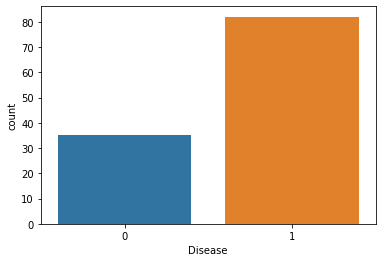

In [18]:
sns.countplot(x="Disease", data=df)

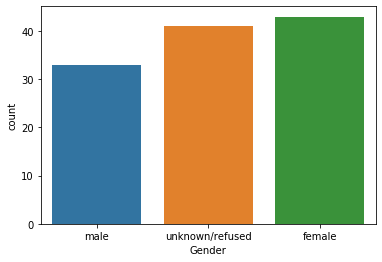

In [19]:
sns.countplot(x="Gender", data=df)

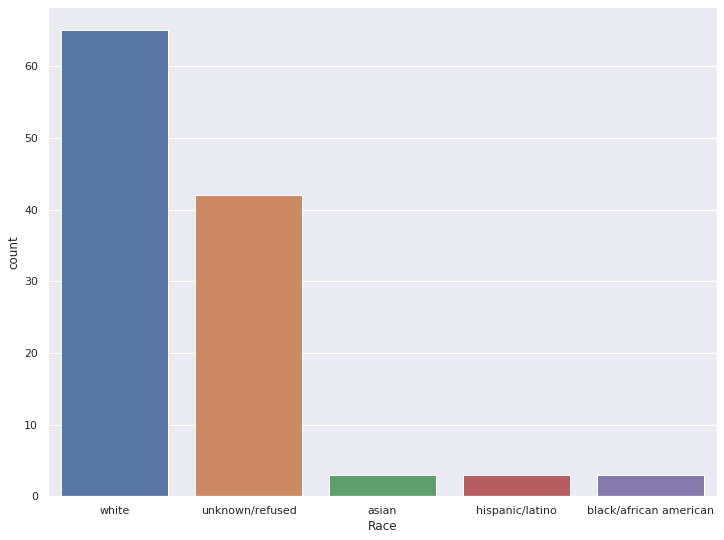

In [20]:
sns.set(rc={'figure.figsize':(12,9)})
sns.countplot(x="Race", data=df)